<a href="https://colab.research.google.com/github/himanshuarora1703/Tutorial-notebooks/blob/main/Logistic%20Regression/Logistic_regression_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
# make dataset

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

Logistic reression works good in linealy separable data.

In [3]:
X[0:5]

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163]])

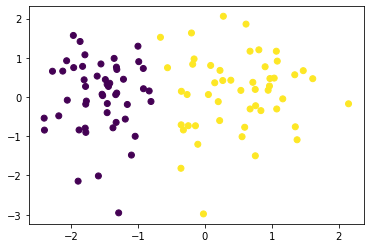

In [4]:
# plot the data

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
# create weights for the data columns

def create_weights(X):
    weights = np.ones(shape=(X.shape[1]))
    return weights

In [6]:
# create a step function

def step(z):
    return 1 if z > 0 else 0

In [7]:
def create_bias(X):
    bias = np.ones(shape=(X.shape[0],1))
    return np.hstack((bias,X))

In [8]:
X.shape

(100, 2)

In [9]:
X[12]

array([-0.02194151, -2.98092432])

In [10]:
y[12]

1

In [11]:
def perceptron(X,y,epochs,lr):
    
    X = create_bias(X)
    weights = create_weights(X)

    for i in range(epochs):
        ind = np.random.randint(0,X.shape[0])
        input_arr = X[ind,:]
        true_y = y[ind]
        y_pred = step(np.dot(input_arr,weights))

        weights = weights + (lr * (true_y-y_pred) * input_arr)


    return weights[0],weights[1:]

In [12]:
bias,weights = perceptron(X,y,1000,0.1)

In [13]:
print(bias)
print(weights)

0.9
[1.31909272 0.06334186]


In [14]:
coef = -(weights[0] / weights[1])

intercept = -(bias / weights[1])

In [15]:
coef

-20.82497617974303

In [16]:
intercept

-14.208613454071727

In [17]:
# plot the line on the graph

# line = mx + c
x_input = np.linspace(-5.5,0.5,100)
line = (coef * x_input) + intercept

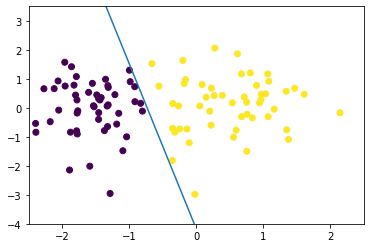

In [ ]:
# plotting

plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_input,line)
plt.xlim(-2.5,2.5)
plt.ylim(-4,3.5)
plt.show()

In [18]:
# animate the process
def perceptron_animated(epochs=1000,lr=0.01,X=X,y=y):
    coef_list =[]
    inter_list = []
    X_new = create_bias(X)
    weights = create_weights(X_new)
    
    for i in range(epochs):
        ind = np.random.randint(0,X_new.shape[0])
        input_arr = X_new[ind,:]
        true_y = y[ind]
        y_pred = step(np.dot(input_arr,weights))

        weights = weights + (lr * (true_y-y_pred) * input_arr)

        coef = -(weights[0] / weights[2])
        inter = -(weights[1] / weights[2])
        coef_list.append(coef)
        inter_list.append(inter)
    return coef_list,inter_list

In [19]:
coef,inter = perceptron_animated()

In [39]:
coef[0]

-1.0

In [20]:
import ipywidgets as widgets

In [46]:
def plot_line(ind=0):
    x = np.arange(-3,3,50)
    line = (coef[ind] * x) + inter[ind] 
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.plot(x,line,color='red')
    plt.title(f'The epoch is {ind}')
    plt.show()

In [47]:
# plot the animated graph
animated = widgets.Play(min=0,max=1000)

widgets.interact(plot_line,ind=(0,1000,1))

interactive(children=(IntSlider(value=0, description='ind', max=1000), Output()), _dom_classes=('widget-intera…

<function __main__.plot_line(ind=0)>